In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [114]:
# Each trial will be a 60 shot vector, 
stops = np.array([10,20])
X = np.array([[1 if (j in (stops+i)) else 0 for j in range(60)] for i in range(60)])

In [148]:
# reward at step 60
R = np.array([[0] for i in range(60)])
R[59][0] = 1
# Initial weights are 0
W = np.array([[0] for i in range(60)])
# Learning rate
alpha = 0.1
gamma = 0.8

In [149]:
# equation 3 from paper
def error(r, v, gamma):
    # err = np.array([[(r[i][0] + gamma*v[i+1][0] - v[i][0])] for i in range(60)])
    err = []
    for i in range(60):
        r_ = r[i][0]
        if i < 59:
            g_ = gamma*v[i+1][0]
        else:
            g_ = 0
        v_ = v[i][0]
        err.append([r_ + g_ - v_])

    return np.array(err)

In [150]:
# Equation 4
def pred_rewards(x, w):
    return np.dot(x, w)

In [157]:
# Equation 2
def future_rewards(r, gamma):
    prev = 0
    v = []
    for i in range(60):
        v_t = r[59-i][0] + gamma*prev
        v.append(v_t)
        prev = v_t
    v.reverse
#     print(v)
    return np.array(v).reshape(60,1)

In [158]:
for i in range(60):
    V_hat = pred_rewards(X, W)
    V = future_rewards(R, gamma)
    prediction_error = V - V_hat
    # print(R.shape, V_hat.shape)
    err = error(R, V_hat, gamma)
    # Equation 5 from paper
    delta_w = alpha*(np.dot(X.T, err))
    # print(delta_w)
    W = W - delta_w

<IPython.core.display.Javascript object>


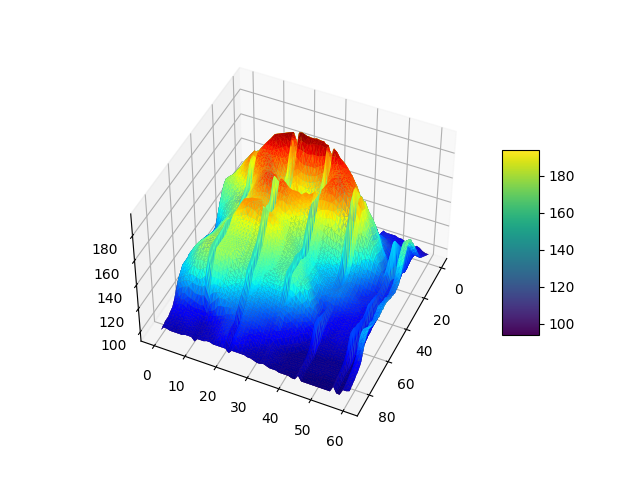

In [2]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()